In [224]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

def merge_dictionary(list_of_Dict):
    merged_data = {}

    for d in list_of_Dict:
        for k, v in d.items():
            if k not in merged_data.keys():
                merged_data[k] = [v]
            else:
                merged_data[k].append(v)

    for k, v in merged_data.items():
        merged_data[k] = np.concatenate(merged_data[k])

    return merged_data

def get_data_statistics(data):
    stats = {}
    for k, v in data.items():
        if k == 'terminals':
            continue
        # plot_histogram(v, k)
        stat = {}
        stat["mean"] = v.mean()
        stat["std"] = v.std()
        stat["min"] = v.min()
        stat['max'] = v.max()
        stat['q1'] = np.quantile(v, 0.25)
        stat['q2'] = np.quantile(v, 0.5)
        stat['q3'] = np.quantile(v, 0.75)
        stats[k] = stat
    return pd.DataFrame(stats)

def plot_histogram(data, name):
    plt.hist(data.reshape(-1), bins=25)
    plt.title(name)
    plt.show()

In [225]:
original_data = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-v2.pkl', allow_pickle=True))
original_data_stat = get_data_statistics(original_data)
original_data_stat

observations  next_observations   actions   rewards
mean      0.248820           0.249108 -0.369517  4.770336
std       4.550283           4.552587  0.712625  1.210174
min     -28.841232         -28.841232 -1.000000 -2.835330
max      29.017124          29.017124  1.000000  8.326745
q1       -0.513655          -0.514266 -0.962031  4.300481
q2       -0.084860          -0.085237 -0.771413  4.964806
q3        0.620668           0.622914  0.276091  5.525497

(array([2.000000e+00, 1.300000e+01, 5.060000e+02, 8.651000e+03,
        2.106200e+04, 3.495700e+04, 5.238000e+04, 7.942600e+04,
        1.334170e+05, 1.784720e+05, 2.851580e+05, 4.483680e+05,
        5.359340e+05, 7.033850e+05, 8.204422e+06, 3.174216e+06,
        6.661500e+05, 9.580500e+05, 5.747390e+05, 2.670450e+05,
        2.513200e+05, 1.948290e+05, 1.103330e+05, 5.929600e+04,
        3.394200e+04, 1.658200e+04, 5.612000e+03, 1.401000e+03,
        3.150000e+02, 1.700000e+01]),
 array([-28.841232  , -26.91262   , -24.984009  , -23.055397  ,
        -21.126785  , -19.198174  , -17.269562  , -15.340949  ,
        -13.412337  , -11.483726  ,  -9.555114  ,  -7.6265016 ,
         -5.69789   ,  -3.7692778 ,  -1.8406659 ,   0.08794594,
          2.016558  ,   3.9451697 ,   5.8737817 ,   7.8023934 ,
          9.731006  ,  11.659617  ,  13.588229  ,  15.516841  ,
         17.445454  ,  19.374065  ,  21.302677  ,  23.231289  ,
         25.1599    ,  27.088512  ,  29.017124  ], dtype=float32),

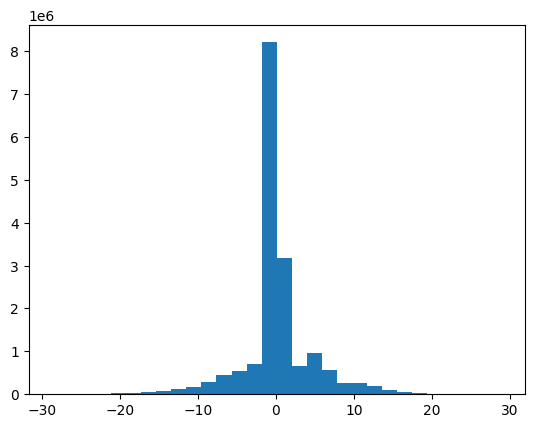

In [230]:
plt.hist(original_data['observations'].reshape(-1), bins = 30)

In [66]:
uncond_5m_data = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/uncond_mixer_5m_05_final_with_reward.npy', allow_pickle=True))
uncond_5m_stat = get_data_statistics(uncond_5m_data)
uncond_5m_stat

observations    actions  next_observations   rewards
mean      0.260310  -0.371362           0.260560  4.759222
std       4.557048   0.713073           4.560000  1.203170
min     -93.695747 -35.485054         -93.695747 -6.546687
max      29.433428   2.767196          29.433428  8.631576
q1       -0.512780  -0.961104          -0.512906  4.224962
q2       -0.086031  -0.777690          -0.085998  4.916124
q3        0.620927   0.280237           0.621170  5.523132

In [67]:
uncond_2m_data = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5m_samples_bf0_with_reward.npy', allow_pickle=True))
uncond_2m_stat = get_data_statistics(uncond_2m_data)
uncond_2m_stat

observations    actions  next_observations    reward
mean      0.261190  -0.374060           0.261076  4.769424
std       4.559399   0.712405           4.562095  1.197237
min     -85.161583 -35.485054         -85.161583 -6.613671
max      29.108351   2.690193          29.108351  8.896860
q1       -0.512704  -0.961358          -0.512967  4.172760
q2       -0.086244  -0.781175          -0.086241  4.902369
q3        0.620612   0.273986           0.620574  5.551726

In [93]:
uncond_2m_data = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/model-1000000_bf20_all.npy', allow_pickle=True))
uncond_2m_stat = get_data_statistics(uncond_2m_data)
uncond_2m_stat

observations   actions  next_observations   rewards
mean      0.263225 -0.372772           0.263073  4.926299
std       4.562777  0.711791           4.563181  0.982467
min     -31.862503 -1.510718         -31.862503 -2.996704
max      29.393639  1.459905          29.393639  9.417097
q1       -0.512830 -0.960015          -0.513271  4.441439
q2       -0.086099 -0.779205          -0.085989  5.027802
q3        0.620454  0.274239           0.620547  5.558076

In [68]:
cond_2_5m_data_50 = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/mixer_cond_model-500000_bf_all_with_reward.npy', allow_pickle=True))
cond_2_5m_stat_50 = get_data_statistics(cond_2_5m_data_50)
cond_2_5m_stat_50

observations   actions  next_observations   rewards
mean      0.254899 -0.370768           0.255818  4.762465
std       4.541313  0.712011           4.545480  1.206868
min     -31.265366 -1.147562         -31.265366 -3.113170
max      29.330681  1.293250          29.330681  8.605480
q1       -0.512221 -0.960821          -0.512218  4.245712
q2       -0.085823 -0.775134          -0.085817  4.929962
q3        0.618539  0.278372           0.619107  5.525553

In [69]:
cond_2_5m_data_10 = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/cond_mixer_2x_5m_01_with_reward.npy', allow_pickle=True))
cond_2_5m_stat_10 = get_data_statistics(cond_2_5m_data_10)
cond_2_5m_stat_10

observations   actions  next_observations   rewards
mean      0.255426 -0.369736           0.256533  4.765586
std       4.569749  0.711628           4.572020  1.209690
min     -25.923223 -1.033025         -25.923223 -2.434323
max      27.611885  1.040118          27.611885  8.021449
q1       -0.515499 -0.960983          -0.515274  4.257715
q2       -0.085159 -0.772307          -0.085065  4.947875
q3        0.620192  0.276647           0.620980  5.531944

In [99]:
cond_2_5m_data_10 = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/2_5M-4x-temporalattention-50-sar-oracle.npy', allow_pickle=True))

In [95]:
cond_2_5m_data_10 = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/2_5M-4x-temporalattention-50-sar-oracle.npy', allow_pickle=True))
cond_2_5m_stat_10 = get_data_statistics(cond_2_5m_data_10)
cond_2_5m_stat_10

observations   actions  next_observations   rewards
mean      0.258653 -0.371099           0.258680  4.882173
std       4.555619  0.713356           4.558303  1.003333
min     -30.336617 -2.940337         -30.336617 -2.729460
max      29.368803  3.353104          29.368803  8.641412
q1       -0.513492 -0.959959          -0.513714  4.393360
q2       -0.085909 -0.777870          -0.085894  4.996371
q3        0.625256  0.278691           0.625320  5.533091

In [80]:
df = pd.concat([original_data_stat.rewards, uncond_5m_stat.rewards, cond_2_5m_stat_10.rewards, cond_2_5m_stat_50.rewards, ], axis=1)
df.columns = ['original', 'unconditioned', 'conditioned, 10% oscillation', 'conditioned, 50% oscillation',]
df

original  unconditioned  conditioned, 10% oscillation  \
mean  4.770336       4.759222                      4.765586   
std   1.210174       1.203170                      1.209690   
min  -2.835330      -6.546687                     -2.434323   
max   8.326745       8.631576                      8.021449   
q1    4.300481       4.224962                      4.257715   
q2    4.964806       4.916124                      4.947875   
q3    5.525497       5.523132                      5.531944   

      conditioned, 50% oscillation  
mean                      4.762465  
std                       1.206868  
min                      -3.113170  
max                       8.605480  
q1                        4.245712  
q2                        4.929962  
q3                        5.525553

In [89]:
df = pd.read_csv("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/augmentation_stats.csv")
df

Unnamed: 0  TD3-BC score  IQL score  \
0                 5M 2x conditioned mixer 10% (s,a,)        47.888        NaN   
1                  5M unconditioned mixer 50% (s,a,)        49.700     50.154   
2   5M 2x conditioned temporal attention 50% (s,a,r)        49.181        NaN   
3  5M 1.5x conditioned temporal attention 50% (s,...           NaN        NaN   
4  5M 4.0x conditioned temporal attention 50% (s,...           NaN        NaN   

   conditioned      mean       std       min        max        q1        q2  \
0          2.0  0.036154  0.158498  0.000076   2.792098  0.001613  0.003299   
1          0.0  0.204881  1.495837  0.000019  52.596032  0.001890  0.006417   
2          2.0  0.171000  1.272396  0.000054  42.000000  0.001486  0.005808   
3          1.5  0.183749  1.189274  0.000056  37.096390  0.001797  0.007715   
4          4.0  0.234546  1.286008  0.000098  28.014220  0.002329  0.008889   

   ...      q1.1      q2.1      q3.1    mean.2     std.2     min.2     max.2  \
0  ...  0.012278  0.020687  0.031836  5.218594  1.133149  1.563510  7.143826   
1  ...  0.001822  0.008311  0.026418  5.057196  0.957037  0.900914  7.832328   
2  ...  0.000020  0.000096  0.000370  5.220000  0.070200  2.270000  7.470000   
3  ...  0.000026  0.000125  0.000451  3.991128  1.290000 -0.563603  9.390000   
4  ...  0.000035  0.000162  0.000630  4.852363  0.941000  1.568723  7.610000   

       q1.2      q2.2      q3.2  
0  4.765534  5.329489  6.029874  
1  4.586398  5.166574  5.682584  
2  4.770000  5.230000  5.690000  
3  2.000000  4.120000  4.986582  
4  4.239039  4.890000  5.515297  

[5 rows x 25 columns]

In [84]:
df.corr()

TD3-BC score  IQL score  conditioned      mean       std  \
TD3-BC score      1.000000        NaN    -0.721112  0.995876  0.992171   
IQL score              NaN        NaN          NaN       NaN       NaN   
conditioned      -0.721112        NaN     1.000000  0.115238 -0.156897   
mean              0.995876        NaN     0.115238  1.000000  0.946679   
std               0.992171        NaN    -0.156897  0.946679  1.000000   
min              -0.931063        NaN     0.956473 -0.128255 -0.411551   
max               0.996923        NaN    -0.477260  0.774187  0.934670   
q1                0.472121        NaN     0.481451  0.629757  0.377017   
q2                0.995353        NaN     0.355003  0.918385  0.763434   
q3                0.959824        NaN     0.287306  0.962003  0.859987   
mean.1           -0.196914        NaN    -0.582454 -0.513629 -0.408247   
std.1             0.591461        NaN    -0.751282  0.113249  0.268331   
min.1            -0.943221        NaN    -0.009556 -0.944716 -0.961903   
max.1             0.949638        NaN    -0.534083  0.686005  0.816626   
q1.1             -0.913771        NaN    -0.070967 -0.931905 -0.936871   
q2.1             -0.771716        NaN    -0.260226 -0.853127 -0.818329   
q3.1             -0.392647        NaN    -0.506320 -0.632156 -0.543367   
mean.2           -0.715887        NaN     0.009772 -0.338036 -0.254777   
std.2            -0.386634        NaN    -0.087702 -0.154975 -0.299753   
min.2            -0.260267        NaN     0.356837 -0.181300 -0.163560   
max.2             0.963209        NaN    -0.238379  0.373238  0.372989   
q1.2             -0.706177        NaN     0.050586 -0.254837 -0.194186   
q2.2             -0.993432        NaN    -0.049689 -0.388522 -0.298421   
q3.2             -0.965584        NaN    -0.017144 -0.590130 -0.533107   

                   min       max        q1        q2        q3  ...      q1.1  \
TD3-BC score -0.931063  0.996923  0.472121  0.995353  0.959824  ... -0.913771   
IQL score          NaN       NaN       NaN       NaN       NaN  ...       NaN   
conditioned   0.956473 -0.477260  0.481451  0.355003  0.287306  ... -0.070967   
mean         -0.128255  0.774187  0.629757  0.918385  0.962003  ... -0.931905   
std          -0.411551  0.934670  0.377017  0.763434  0.859987  ... -0.936871   
min           1.000000 -0.699116  0.405018  0.172620  0.063507  ...  0.181814   
max          -0.699116  1.000000  0.081019  0.513127  0.642951  ... -0.816328   
q1            0.405018  0.081019  1.000000  0.758586  0.637300  ... -0.353722   
q2            0.172620  0.513127  0.758586  1.000000  0.976516  ... -0.848607   
q3            0.063507  0.642951  0.637300  0.976516  1.000000  ... -0.939280   
mean.1       -0.422746 -0.205681 -0.179627 -0.652636 -0.701030  ...  0.697841   
std.1        -0.756327  0.445811  0.053127 -0.159255 -0.142406  ...  0.078835   
min.1         0.244119 -0.855199 -0.361184 -0.839400 -0.931208  ...  0.996590   
max.1        -0.712626  0.878006  0.269021  0.389643  0.470546  ... -0.564501   
q1.1          0.181814 -0.816328 -0.353722 -0.848607 -0.939280  ...  1.000000   
q2.1         -0.021794 -0.658747 -0.320601 -0.843376 -0.925297  ...  0.966847   
q3.1         -0.318327 -0.346203 -0.231355 -0.731927 -0.791045  ...  0.799643   
mean.2       -0.019783 -0.187211 -0.247902 -0.572698 -0.496052  ...  0.423566   
std.2         0.114103 -0.337899  0.399762  0.096542 -0.098156  ...  0.323416   
min.2         0.264414 -0.203146 -0.161390 -0.348391 -0.255688  ...  0.203015   
max.2        -0.233607  0.381796  0.099933  0.518171  0.484894  ... -0.494371   
q1.2          0.006245 -0.156727 -0.136179 -0.487933 -0.420297  ...  0.374433   
q2.2         -0.057398 -0.211420 -0.264994 -0.621788 -0.554773  ...  0.485020   
q3.2          0.051999 -0.442196 -0.287382 -0.744169 -0.722657  ...  0.698499   

                  q2.1      q3.1    mean.2     std.2     min.2     max.2  \
TD3-BC score -0.771716 -0.392647 -0.715887 -0.386634 -0.26026

<AxesSubplot:>

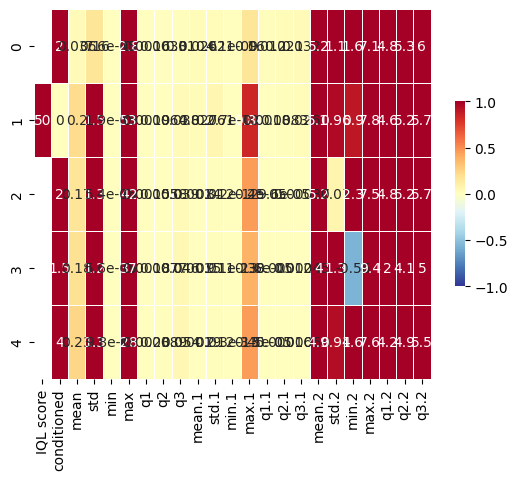

In [91]:
import seaborn as sns
df = df.iloc[:,1:]
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 

In [86]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [98]:
pd.read_csv("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/statistics/data_statistics.csv")

Unnamed: 0        Unnamed: 0.1  \
0                    0     dynamic_mse_max   
1                    1    dynamic_mse_mean   
2                    2     dynamic_mse_min   
3                    3      dynamic_mse_q1   
4                    4      dynamic_mse_q2   
5                    5      dynamic_mse_q3   
6                    6     dynamic_mse_std   
7                    7   oracle_reward_max   
8                    8  oracle_reward_mean   
9                    9   oracle_reward_min   
10                  10    oracle_reward_q1   
11                  11    oracle_reward_q2   
12                  12    oracle_reward_q3   
13                  13   oracle_reward_std   
14                  14      reward_mse_max   
15                  15     reward_mse_mean   
16                  16      reward_mse_min   
17                  17       reward_mse_q1   
18                  18       reward_mse_q2   
19                  19       reward_mse_q3   
20                  20      reward_mse_std   
21     dynamic_mse_max                 NaN   
22    dynamic_mse_mean                 NaN   
23     dynamic_mse_min                 NaN   
24      dynamic_mse_q1                 NaN   
25      dynamic_mse_q2                 NaN   
26      dynamic_mse_q3                 NaN   
27     dynamic_mse_std                 NaN   
28   oracle_reward_max                 NaN   
29  oracle_reward_mean                 NaN   
30   oracle_reward_min                 NaN   
31    oracle_reward_q1                 NaN   
32    oracle_reward_q2                 NaN   
33    oracle_reward_q3                 NaN   
34   oracle_reward_std                 NaN   
35      reward_mse_max                 NaN   
36     reward_mse_mean                 NaN   
37      reward_mse_min                 NaN   
38       reward_mse_q1                 NaN   
39       reward_mse_q2                 NaN   
40       reward_mse_q3                 NaN   
41      reward_mse_std                 NaN   

    2_5M-1_5x-temporalattention-50-sar-oracle.npy  
0                                        6.776766  
1                                        0.180311  
2                                        0.000133  
3                                        0.001687  
4                                        0.006452  
5                                        0.040105  
6                                        0.854831  
7                                        7.913149  
8                                        5.335252  
9                                        3.177347  
10                                       4.711193  
11                                       5.287601  
12                                       6.012431  
13                                       0.897267  
14                                       0.000000  
15                                       0.000000  
16                                       0.000000  
17                                       0.000000  
18                                       0.000000  
19                                       0.000000  
20                                       0.000000  
21                                       6.776766  
22                                       0.180311  
23                                       0.000133  
24                                       0.001687  
25                                       0.006452  
26                                       0.040105  
27                                       0.854831  
28                                       7.913149  
29                                       5.335252  
30                                       3.177347  
31                                       4.711193  
32                                       5.287601  
33                                       6.012431  
34                                       0.897267  
35                                       0.000000  
36                                       0.000000  
37                                       0.000000  
38   

In [150]:
cond_2_5m_data_10 = np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5M-1_1x-mixer-50-sar.npy', allow_pickle=True)[:-1]
meta = np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5M-1_1x-mixer-50-sar.npy', allow_pickle=True)[-1]

In [202]:
reward_list = []

for traj in cond_2_5m_data_10:
    for k, v in traj.items():
        if k == 'rewards':
            reward_list.append(v.sum())

reward_list = torch.tensor(reward_list)
length = reward_list.__len__()
values, idx = torch.sort(reward_list, descending=True)
topk = cond_2_5m_data_10[idx.detach().numpy()][:int(length * 0.1)]
topk = np.concatenate([topk, np.array(meta).reshape(1)])
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5M-1_1x-mixer-50-sar-top_k.npy', topk)

In [208]:
reward_l = []
for traj in topk:
    for k, v in traj.items():
        if k == 'rewards':
            reward_l.append(v.sum())

200.82335

In [161]:
rand = cond_2_5m_data_10[:int(length * 0.1)]
rand = np.concatenate([rand, np.array(meta).reshape(1)])
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5M-1_1x-mixer-50-sar-random_sampling.npy', rand)

In [179]:
reward_list_exp

array(nan, dtype=float32)

In [186]:
reward_list_exp = (reward_list - reward_list.max()).exp()
reward_list_exp = (reward_list_exp / reward_list_exp.sum()).detach().numpy()
reward_based_sample = np.random.choice(reward_list_exp.__len__(),size=int(length*0.1), p=reward_list_exp)

reward_based_sample = cond_2_5m_data_10[reward_based_sample]
reward_based_sample = np.concatenate([reward_based_sample, np.array(meta).reshape(1)])
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/5M-1_1x-mixer-50-sar-reward_based_sample.npy', topk)

In [200]:
values[idx].mean()

tensor(163.9513)

In [201]:
values[idx][:1800].mean()

tensor(163.4642)

In [194]:
idx[:18000]

tensor([167386,  36386,   7386,  ..., 103765, 160442,  91205])

In [187]:
reward_based_sample.__len__()

18001

In [223]:
np.array(reward_l).min()

192.836

(0.0, 250.0)

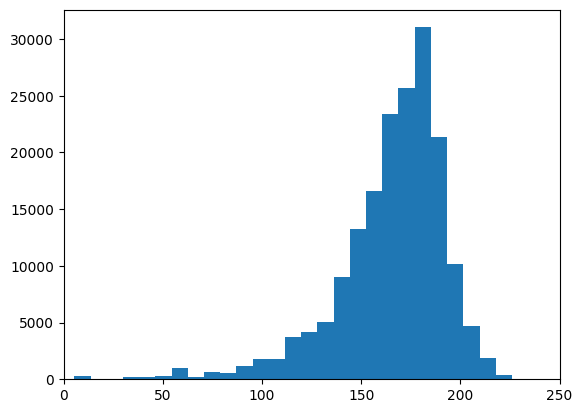

In [142]:
plt.hist(values.detach().numpy(), bins=30)
plt.xlim([0, 250])

(0.0, 250.0)

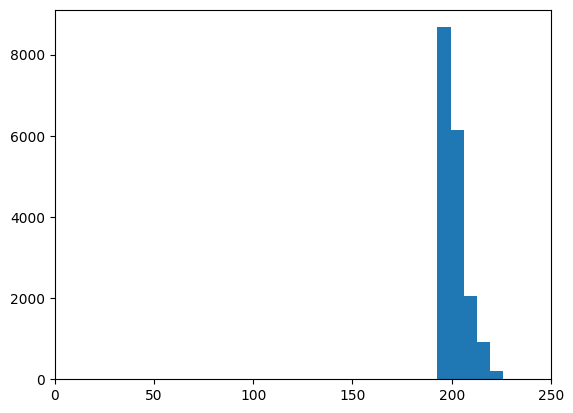

In [212]:
plt.hist(reward_l, bins=5)
plt.xlim([0, 250])

In [222]:
reward_l.min()

AttributeError: 'list' object has no attribute 'min'

array([{'observations': array([[-4.67547476e-01,  3.29388070e+00,  2.72517890e-01,
               -9.82502550e-02,  8.87718499e-02,  4.88496542e-01,
                2.77368367e-01,  1.39547855e-01, -1.27972651e+00,
                4.10252571e-01, -6.16634727e-01,  8.96309280e+00,
               -4.19714928e+00,  1.06877460e+01,  8.89715004e+00,
                5.91801023e+00, -1.14481535e+01],
              [-4.74130988e-01,  3.25770259e+00,  3.41637164e-01,
                3.66286933e-02,  1.84606969e-01,  5.60439050e-01,
                6.61737680e-01, -4.26905274e-01,  5.17511368e-02,
               -5.59880793e-01, -5.60017884e-01, -2.65680861e+00,
                5.25848007e+00, -3.04928017e+00, -1.96583045e+00,
                5.85435724e+00, -9.79445267e+00],
              [-5.26138246e-01,  3.28866959e+00,  2.40810663e-01,
               -3.89127135e-02,  1.32255793e-01,  5.75439751e-01,
                3.23889971e-01, -3.91642869e-01,  2.81696320e-02,
               -1.2454310

In [217]:
original_data = np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-v2.pkl', allow_pickle=True)

In [218]:


reward_list = []

for traj in original_data:
    for k, v in traj.items():
        if k == 'rewards':
            reward_list.append(v.sum()*32/1000)


(0.0, 250.0)

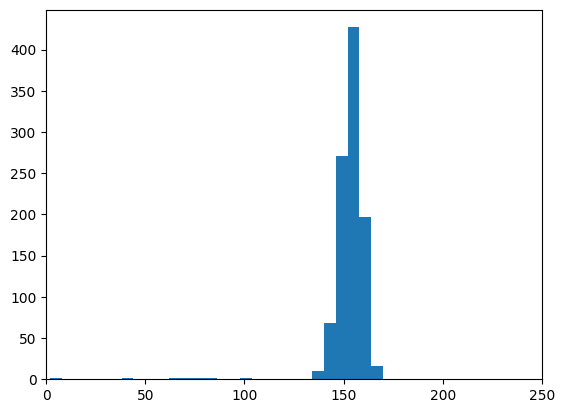

In [219]:
plt.hist(reward_list, bins=30)
plt.xlim([0, 250])


In [ ]:
np.array(values).max()

In [221]:
np.array(reward_list).max()

169.900140625

In [234]:
original_data = merge_dictionary(np.load('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-v2.pkl', allow_pickle=True))

(1000000, 17)

In [235]:
original_data['observations'].shape

(1000000, 17)

In [240]:
cd ..

/mnt/HDD/jaewoo/practices/diffusers/Augmentation-For-OfflineRL


In [241]:
from corl.shared.buffer import SequenceDataset

No module named 'flow'
/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
pybullet build time: May 20 2022 19:43:01


In [242]:
ds= SequenceDataset(
    dataset=original_data,
    seq_len=20,
    reward_scale=1000,
    sampling_rtg_flag=False
)

Processing trajectories: 100%|██████████| 1000000/1000000 [00:20<00:00, 48244.91it/s]


The Number of Trajectories:  1000


In [267]:
returns = []
for i in range(ds.dataset.__len__()):
    returns.append(ds.dataset[i]['returns'])
returns_mean = np.stack(returns, 0).mean(0)
returns_std = np.stack(returns, 0).std(0)

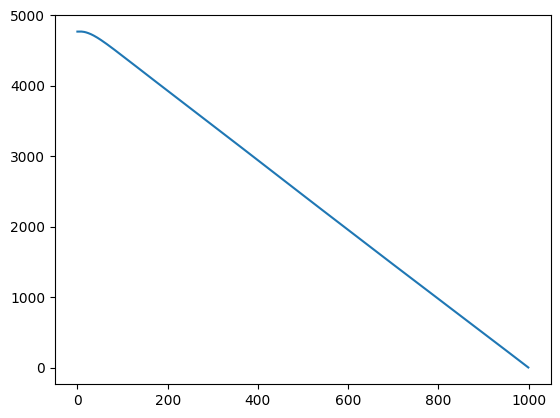

In [266]:
plt.plot(returns)

In [248]:
ds.dataset[0]['rewards']

array([-0.20008013, -1.1981525 , -0.69075197,  0.2682023 ,  1.1128312 ,
        0.90088403,  0.6158797 ,  0.6835481 ,  0.6830821 ,  1.4565979 ,
        2.1608267 ,  1.3489993 ,  1.1941644 ,  1.6499102 ,  1.7258703 ,
        1.783267  ,  2.9154148 ,  2.8038454 ,  2.056616  ,  2.6501825 ,
        3.218976  ,  2.7066114 ,  3.3128161 ,  3.4596922 ,  2.9327698 ,
        3.2771542 ,  3.436258  ,  3.1584573 ,  3.3621433 ,  2.9806514 ,
        2.3752644 ,  3.0334039 ,  3.7905142 ,  3.4989038 ,  3.5472853 ,
        3.0005822 ,  2.7778475 ,  2.508649  ,  2.902979  ,  3.4687405 ,
        3.0082734 ,  2.5429823 ,  4.1058326 ,  3.728451  ,  3.6588552 ,
        3.8079383 ,  4.123121  ,  4.398407  ,  4.5879717 ,  4.2060604 ,
        3.9948876 ,  4.4056497 ,  3.769341  ,  4.1289463 ,  4.6669955 ,
        4.1729646 ,  4.2313843 ,  4.913796  ,  4.314472  ,  4.304136  ,
        4.8696876 ,  4.52334   ,  4.725401  ,  5.306328  ,  4.890391  ,
        4.3180256 ,  5.205975  ,  5.251531  ,  5.26711   ,  5.75

In [19]:
envs = ['halfcheetah', 'walker2d','hopper']
quals = ['medium', 'medium-expert', 'medium-replay', 'random']
for env in envs:
    for qual in quals:
        print('"'+env+"-"+qual+"-v2"+'"', end = " ")

"halfcheetah-medium-v2" "halfcheetah-medium-expert-v2" "halfcheetah-medium-replay-v2" "halfcheetah-random-v2" "walker2d-medium-v2" "walker2d-medium-expert-v2" "walker2d-medium-replay-v2" "walker2d-random-v2" "hopper-medium-v2" "hopper-medium-expert-v2" "hopper-medium-replay-v2" "hopper-random-v2" 

In [274]:
d = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/generated_data/155000K-1_1x-resmlp-50-sar.npy", allow_pickle=True)

In [275]:
fig = d[-1]

In [278]:
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa.npy', fig)

In [280]:
fig[:-1]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 fig[:-1]                                                                                     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: unhashable type: 'slice'

In [283]:
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa.npy', d[:-1])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa.npy',      │
│   2                                                                                              │
│ in save:6                                                                                        │
│                                                                                                  │
│ /home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/numpy/lib/npyio.py:530 in   │
│ save                                                                                             │
│                                                                                                  │
│    527 │   with file_ctx as fid:                                                                 │
│    528 │   │   arr = np.asanyarray(arr)                                                          │
│    529 │   │   format.write_array(fid, arr, allow_pickle=allow_pickle,                           │
│ ❱  530 │   │   │   │   │   │      pickle_kwargs=dict(fix_imports=fix_imports))                   │
│    531                                                                                           │
│    532                                                                                           │
│    533 def _savez_dispatcher(file, *args, **kwds):                                               │
│                                                                                                  │
│ /home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/numpy/lib/format.py:680 in  │
│ write_array                                                                                      │
│                                                                                                  │
│   677 │   │   │   │   │   │   │    "allow_pickle=False")                                         │
│   678 │   │   if pickle_kwargs is None:                                                          │
│   679 │   │   │   pickle_kwargs = {}                                                             │
│ ❱ 680 │   │   pickle.dump(array, fp, protocol=3, **pickle_kwargs)                                │
│   681 │   elif array.flags.f_contiguous and not array.flags.c_contiguous:                        │
│   682 │   │   if isfileobj(fp):                                                                  │
│   683 │   │   │   array.T.tofile(fp)                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa.npy',      │
│   2                                                                                              │
│ in save:6                                                                                        │
│                                                                                                  │
│ /home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/numpy/lib/npyio.py:530 in   │
│ save                                                                                             │
│                                                                                                  │
│    527 │   with file_ctx as fid:                                                                 │
│    528 │   │   arr = np.asanyarray(arr)                                                          │
│    529 │   │   format.write_array(fid, arr, allow_pickle=allow_pickle,                           │
│ ❱  530 │   │   │   │   │   │      pickle_kwargs=dict(fix_imports=fix_imports))                   │
│    531                                                                                           │
│    532                                                                                           │
│    533 def _savez_dispatcher(file, *args, **kwds):                                               │
│                                                                                                  │
│ /home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/numpy/lib/format.py:680 in  │
│ write_array                                                                                      │
│                                                                                                  │
│   677 │   │   │   │   │   │   │    "allow_pickle=False")                                         │
│   678 │   │   if pickle_kwargs is None:                                                          │
│   679 │   │   │   pickle_kwargs = {}                                                             │
│ ❱ 680 │   │   pickle.dump(array, fp, protocol=3, **pickle_kwargs)                                │
│   681 │   elif array.flags.f_contiguous and not array.flags.c_contiguous:                        │
│   682 │   │   if isfileobj(fp):                                                                  │
│   683 │   │   │   array.T.tofile(fp)                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [ ]:
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa.npy', d[:-1])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa.npy',      │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'ᄋ' is not defined

In [287]:
import sys
sys.getsizeof(d[:-1])

104

In [289]:
d[:-1]

array([{'observations': array([[-7.3221453e-02,  1.1159393e-01, -1.7933108e-01, -2.0963641e-01,
               -3.8109919e-01, -2.9251823e-01, -3.0261132e-01, -3.8125366e-03,
                7.0127678e+00,  5.9068751e-02, -2.2437805e-01, -4.2603545e+00,
               -3.5868442e+00, -2.1626725e+00,  2.1500105e+01,  1.0021621e+01,
                1.3158739e+01]], dtype=float32), 'actions': array([[-0.997114  , -0.80569017, -0.9958041 ,  0.14025447,  0.8556485 ,
               -0.35427153]], dtype=float32), 'next_observations': array([[-1.24844305e-01,  1.43870890e-01,  3.28704715e-04,
               -2.43287161e-01, -3.31516236e-01,  5.66386163e-01,
               -1.65743858e-01, -3.83706659e-01,  6.72063828e+00,
                3.04485142e-01,  1.96344650e+00,  7.45598745e+00,
                8.17833138e+00,  4.08324385e+00, -2.58007145e+00,
               -8.23624706e+00, -6.61593056e+00]], dtype=float32), 'rewards': array([[6.260597]], dtype=float32)}                   ,
       {'o

In [ ]:
np.save('/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/notebooks/aa1.npy', d[:-1])

In [17]:
import numpy as np
import torch

/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
d = np.load('../data/generated_data/5M-1_1x-temporalattention-50-sar.npz', allow_pickle=True)

In [24]:
rewards = d['data'][0]['rewards']

In [25]:
returns = d['data'][0]['returns']

In [27]:
returns

array([671.1348 , 665.30426, 659.3447 , 652.7997 , 645.8221 , 639.0725 ,
       632.414  , 625.7588 , 620.2931 , 614.6945 , 609.0399 , 602.7102 ,
       596.5773 , 590.9045 , 584.7943 , 578.51935, 572.6494 , 566.3109 ,
       560.1316 , 554.03186, 548.4084 , 542.7219 , 537.4125 , 532.07965,
       526.2668 , 520.1811 , 515.06525, 510.32208, 505.3567 , 499.8128 ,
       494.26953], dtype=float32)

In [10]:
import numpy as np
d = np.load("../data/generated_data/v2/halfcheetah-medium-v2/11M-1_3x-smallmixer-75-sar-temp1_0.npz", allow_pickle=True)


In [14]:
d['config'].item()

{'modelled_terminals': True,
 'make_inputs': {'modelled_terminals': {'modelled_terminals': None}},
 'split_diffusion_samples': {'modelled_terminals': {'modelled_terminals': None}, 'terminal_threshold': 0.5},
 'construct_diffusion_model': {'normalizer_type': 'standard', 'denoising_network': {'_target_': 'src.diffusion.denoiser_network.mixer.MixerUnet', 'horizon': 32, 'd_in': 4, 'dim': 16, 'cond_dim': 1, 'condition_dropout': 0.25, 'use_dropout': True, 'force_dropout': False, 'learned_sinusoidal_cond': False, 'random_fourier_features': True, 'learned_sinusoidal_dim': 16}, 'disable_terminal_norm': True},
 'ElucidatedDiffusion': {'num_sample_steps': 128, 'sigma_data': 1.0, 'S_churn': 80, 'S_tmin': 0.05, 'S_tmax': 50, 'S_noise': 1.003},
 'Trainer': {'train_batch_size': 256, 'train_lr': 0.0003, 'lr_scheduler': 'cosinewarmup', 'weight_decay': 0, 'train_num_steps': 1000000, 'save_and_sample_every': 200000, 'reweighted_training': True},
 'SimpleDiffusionGenerator': {'num_sample_steps': 128, 'sam

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hfmed    = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-v2.npy", allow_pickle=True)
hfmedrep = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-replay-v2.npy", allow_pickle=True)
hfmedexp = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-expert-v2.npy", allow_pickle=True)
hfr      = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-random-v2.npy", allow_pickle=True)


hoppermed    = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/hopper-medium-v2.npy", allow_pickle=True)
hoppermedrep = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/hopper-medium-replay-v2.npy", allow_pickle=True)
hoppermedexp = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/hopper-medium-expert-v2.npy", allow_pickle=True)
hopperr      = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/hopper-random-v2.npy", allow_pickle=True)

walkermed    = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/walker2d-medium-v2.npy", allow_pickle=True)
walkermedrep = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/walker2d-medium-replay-v2.npy", allow_pickle=True)
walkermedexp = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/walker2d-medium-expert-v2.npy", allow_pickle=True)
walkerr      = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/walker2d-random-v2.npy", allow_pickle=True)


In [37]:
gamma=0.99
discount = np.cumprod(np.ones(1000) * gamma)
discount

array([9.90000000e-01, 9.80100000e-01, 9.70299000e-01, 9.60596010e-01,
       9.50990050e-01, 9.41480149e-01, 9.32065348e-01, 9.22744694e-01,
       9.13517247e-01, 9.04382075e-01, 8.95338254e-01, 8.86384872e-01,
       8.77521023e-01, 8.68745813e-01, 8.60058355e-01, 8.51457771e-01,
       8.42943193e-01, 8.34513761e-01, 8.26168624e-01, 8.17906938e-01,
       8.09727868e-01, 8.01630590e-01, 7.93614284e-01, 7.85678141e-01,
       7.77821359e-01, 7.70043146e-01, 7.62342714e-01, 7.54719287e-01,
       7.47172094e-01, 7.39700373e-01, 7.32303370e-01, 7.24980336e-01,
       7.17730533e-01, 7.10553227e-01, 7.03447695e-01, 6.96413218e-01,
       6.89449086e-01, 6.82554595e-01, 6.75729049e-01, 6.68971759e-01,
       6.62282041e-01, 6.55659221e-01, 6.49102628e-01, 6.42611602e-01,
       6.36185486e-01, 6.29823631e-01, 6.23525395e-01, 6.17290141e-01,
       6.11117240e-01, 6.05006067e-01, 5.98956006e-01, 5.92966446e-01,
       5.87036782e-01, 5.81166414e-01, 5.75354750e-01, 5.69601202e-01,
      

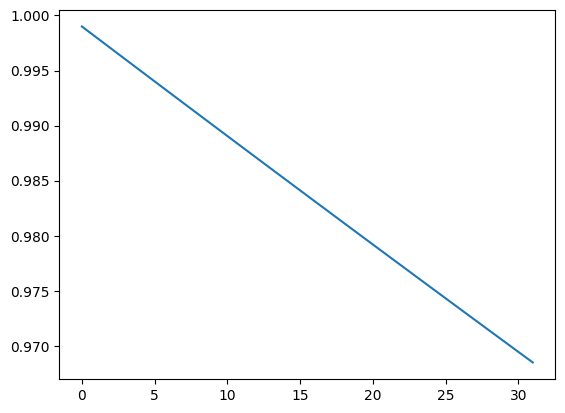

In [119]:
discount = np.cumprod(np.ones(1000) * 0.999) 
plt.plot(discount[:32 ])

In [201]:
def reward_trend(data, start_idx=1, num_of_draw=1, ylim=10):
    for i in range(num_of_draw):
        plt.plot(data[i + start_idx]['rewards'])
        plt.xlim([0, 1000])
        plt.ylim([0, ylim])
    plt.show()

def return_trend(data, gamma=0.99, start_idx=1, num_of_draw=1, panelty=100):
    discount = np.cumprod(np.ones(1000000) * gamma)
    mx = 0
    for i in range(num_of_draw):
        # if data[i + start_idx]['rewards'].shape[0] != 1000:
        #     data[i + start_idx]['rewards'][-1] -= panelty
        ret = calculate_return(data[i + start_idx]['rewards'], gamma=gamma)
        plt.plot(data[i + start_idx]['rewards'] * 10, color='b')
        plt.plot(ret, color='g')
        plt.xlim([0, 10000])
        ylim = np.max(ret) * 1.2
        if ylim > mx:
            mx = ylim
        plt.ylim([0, mx])
    plt.title(f'gamma={gamma}')
    plt.show()

def state_trend(data, start_idx=1, num_of_draw=1, ylim=10):
    for i in range(num_of_draw):
        plt.plot(data[i + start_idx]['observations'])
    plt.show()

def calculate_return(reward_array, gamma=0.99):
    discount = np.cumprod(np.ones(1000000) * gamma)
    ret = np.zeros_like(reward_array)
    for i in range(len(ret)):
        ret[i] = np.sum(reward_array[i:] * discount[:(len(ret)-i)])
    return ret


In [202]:
import gym
import d4rl

env = gym.make("antmaze-umaze-v2")

Target Goal:  (0.9133389090839849, 8.151769634308746)


/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [184]:
d = env.get_dataset()


load datafile: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]


In [199]:
temp = {}
temp['rewards'] = d['rewards'][10000:20000]

In [200]:
d['rewards'].shape

(1000000,)

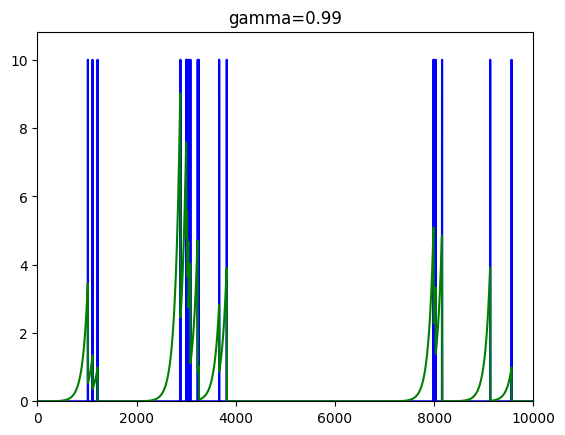

In [203]:
return_trend(data=[temp], gamma=0.99, start_idx=0, num_of_draw=1, panelty=0) 

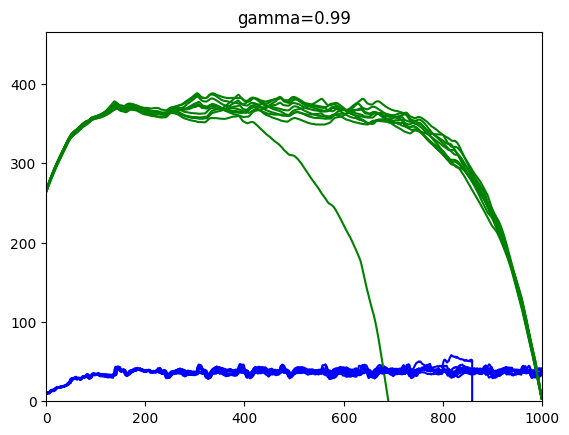

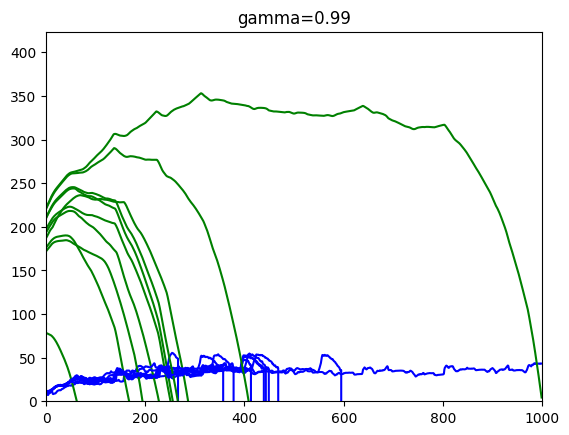

/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


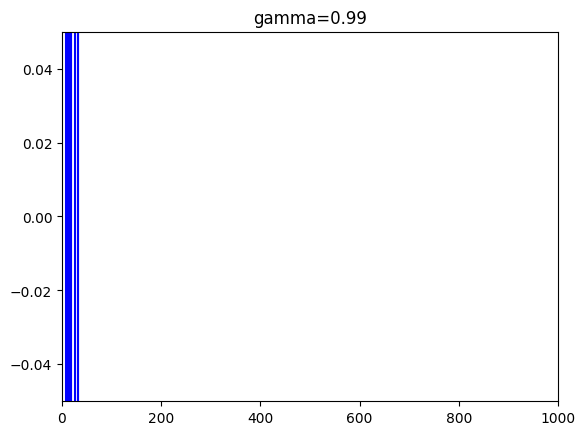

In [144]:
return_trend(hoppermedexp, start_idx=3000, num_of_draw=10, gamma=0.99)
return_trend(hoppermedexp, start_idx=0000, num_of_draw=10, gamma=0.99)
return_trend(hopperr, start_idx=0000, num_of_draw=10)

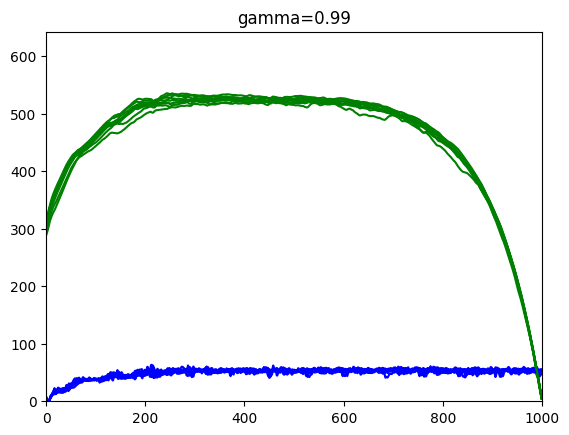

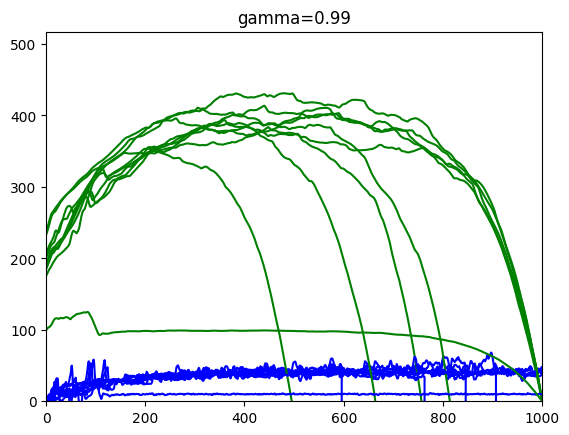

/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


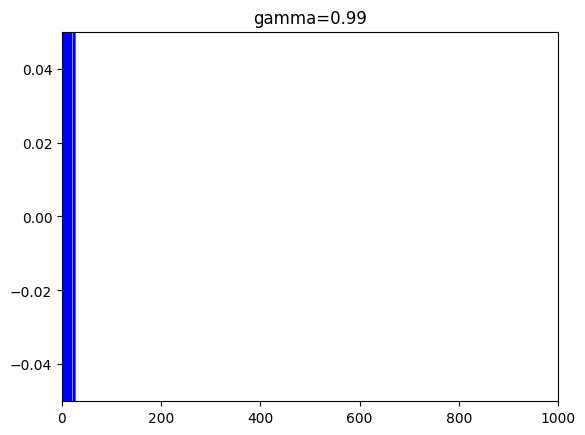

In [145]:
return_trend(walkermedexp, start_idx=2000, num_of_draw=10, gamma=0.99)
return_trend(walkermedexp, start_idx=0000, num_of_draw=10, gamma=0.99)
return_trend(walkerr, start_idx=0000, num_of_draw=10)

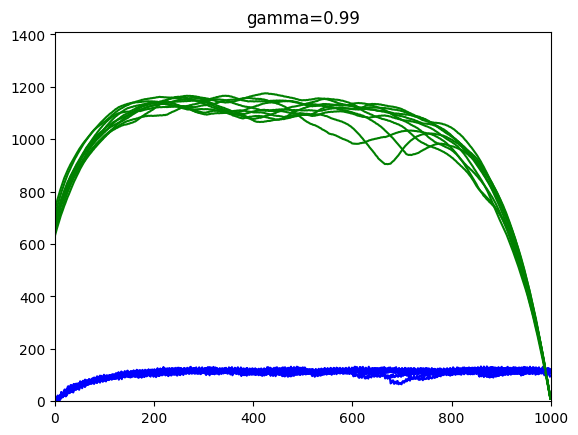

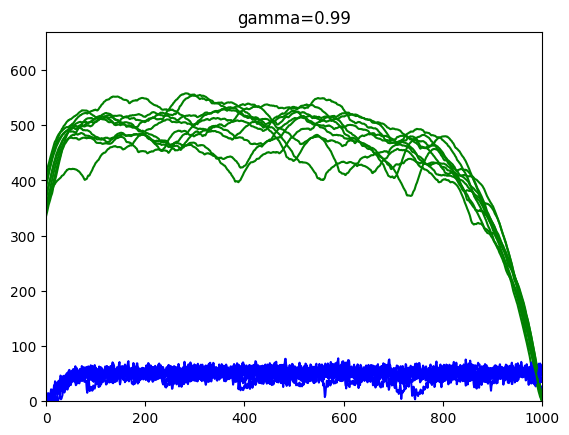

/home/jaewoo/anaconda3/envs/augmentation/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


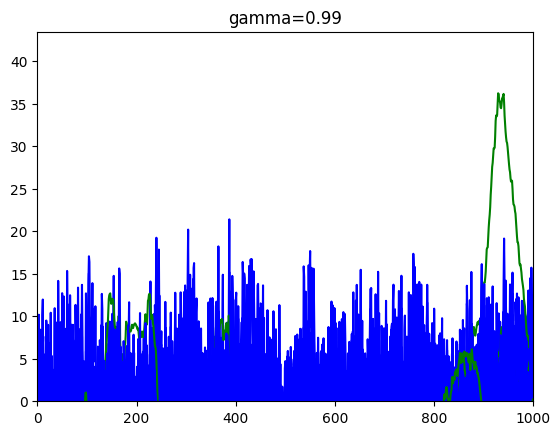

In [147]:
return_trend(hfmedexp, start_idx=1100, num_of_draw=10, gamma=0.99)
return_trend(hfmedexp, start_idx=0000, num_of_draw=10, gamma=0.99)
return_trend(hfr, start_idx=0000, num_of_draw=10)

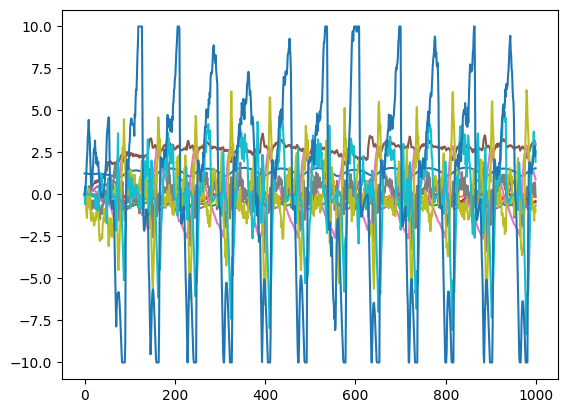

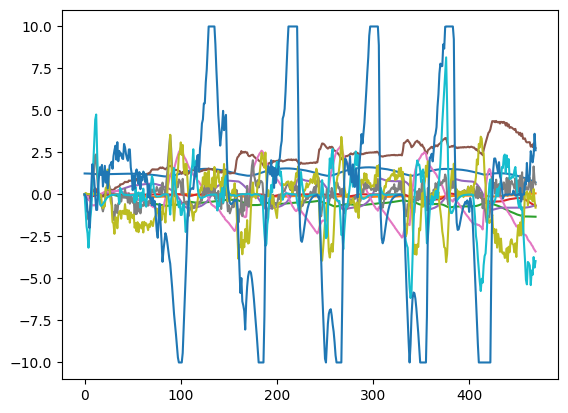

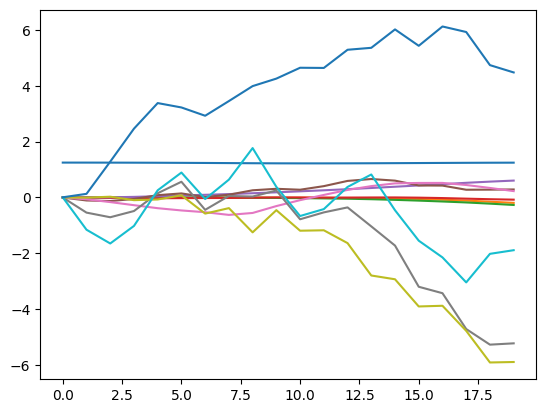

In [35]:
state_trend(hoppermedexp, start_idx=3000, num_of_draw=1)
state_trend(hoppermedexp, start_idx=0000, num_of_draw=1)
state_trend(hopperr, start_idx=0000, num_of_draw=1)

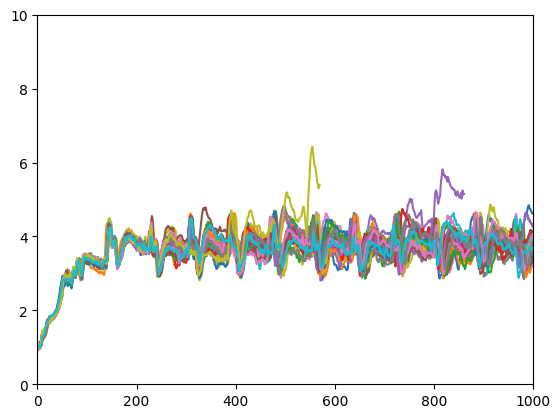

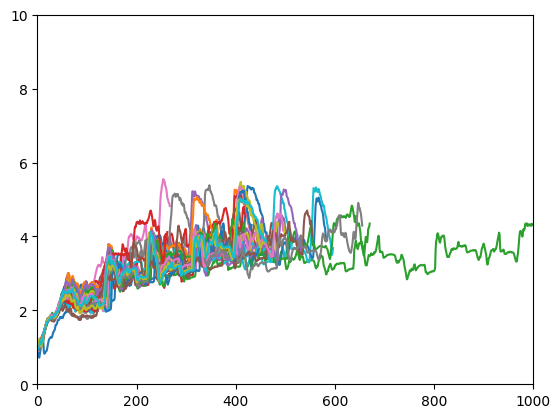

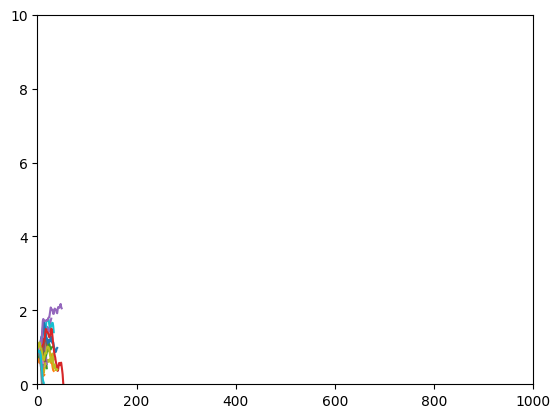

In [24]:
reward_trend(hoppermedexp, start_idx=3000, num_of_draw=30)
reward_trend(hoppermedexp, start_idx=0000, num_of_draw=30)
reward_trend(hopperr, start_idx=0000, num_of_draw=30)

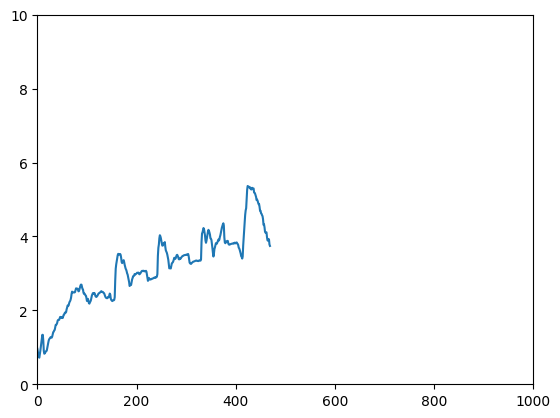

In [36]:
reward_trend(hoppermedexp, start_idx=0, num_of_draw=1)

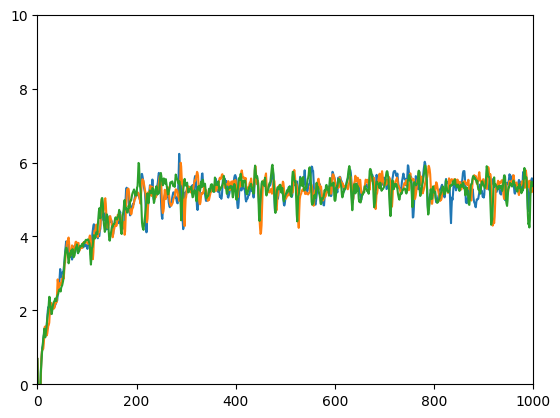

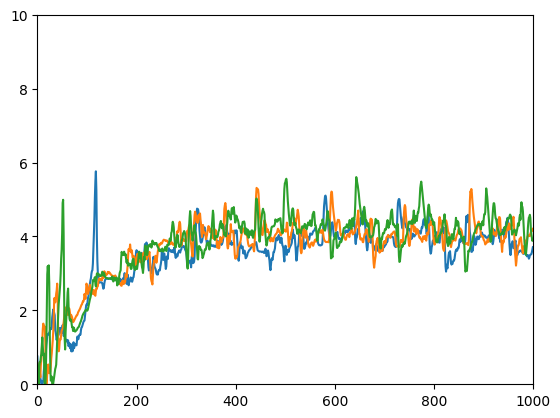

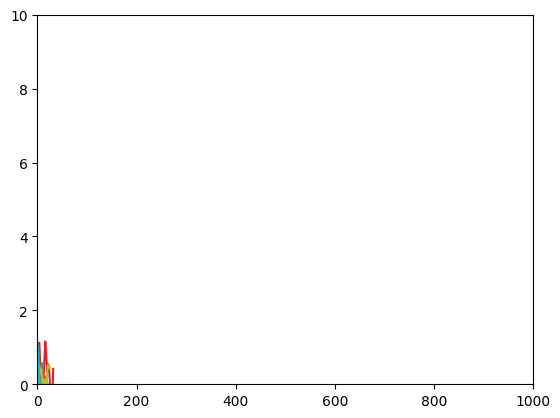

In [29]:
reward_trend(walkermedexp, start_idx=2000, num_of_draw=3)
reward_trend(walkermedexp, start_idx=0000, num_of_draw=3)
reward_trend(walkerr, start_idx=0000, num_of_draw=10)

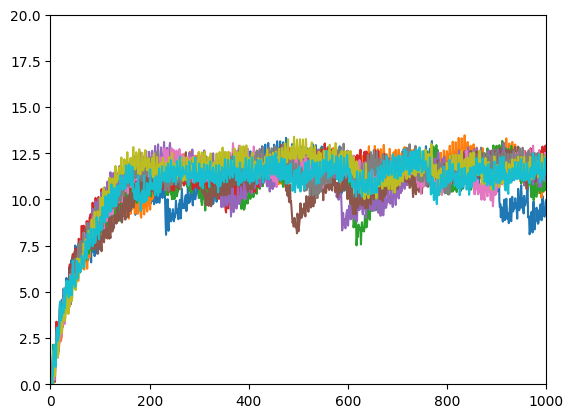

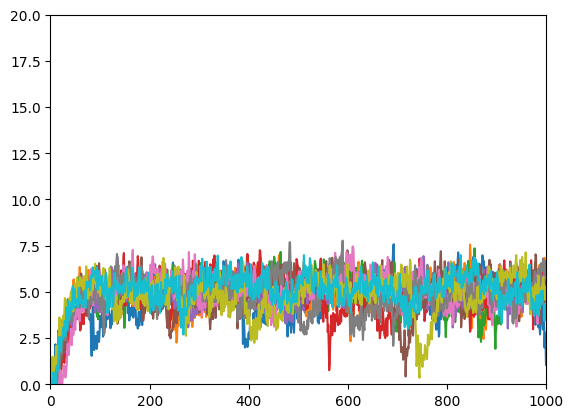

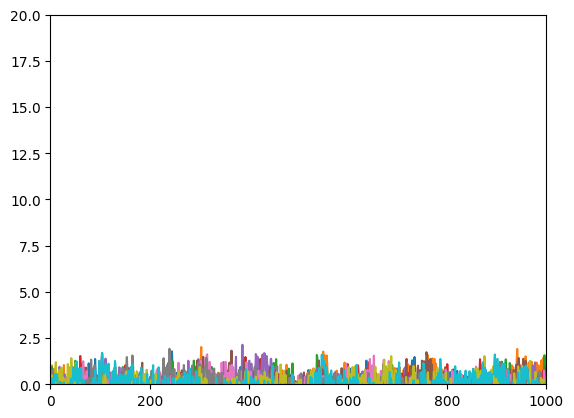

In [30]:
reward_trend(hfmedexp, start_idx=1500, num_of_draw=10, ylim=20)
reward_trend(hfmedexp, start_idx=0000, num_of_draw=10, ylim=20)
reward_trend(hfr, start_idx=0000, num_of_draw=10, ylim=20)

In [221]:
import numpy as np
aa = np.load("/home/jaewoo/practices/diffusers/Augmentation-For-OfflineRL/data/halfcheetah-medium-replay-v2.npy", allow_pickle=True)


array([{'observations': array([[-4.3362133e-02, -2.6833022e-03,  6.5432638e-02, ...,
                1.0888433e-01,  8.8169552e-02,  6.3931167e-02],
              [-3.7674177e-02,  1.5365051e-02,  2.1673881e-01, ...,
               -8.2050276e+00,  2.6932850e+00, -4.4459348e+00],
              [-8.1146188e-02,  1.5728043e-02,  2.3461881e-01, ...,
               -1.2342579e+00, -4.2705555e+00, -3.4320550e+00],
              ...,
              [-5.6956607e-01,  3.2922680e+00, -3.1815246e-01, ...,
               -3.0207298e+00,  2.2088470e+00, -4.5268812e+00],
              [-5.7592243e-01,  3.3024230e+00, -2.3679866e-01, ...,
                9.0879889e+00, -1.4607348e+00, -2.9853027e+00],
              [-5.6932127e-01,  3.2941539e+00, -2.2014110e-01, ...,
               -6.1263404e+00,  3.7058628e+00,  1.0001764e+01]], dtype=float32), 'next_observations': array([[-0.03767418,  0.01536505,  0.2167388 , ..., -8.205028  ,
                2.693285  , -4.445935  ],
              [-0.08114619,

In [224]:
aa[0]

{'observations': array([[-4.3362133e-02, -2.6833022e-03,  6.5432638e-02, ...,
          1.0888433e-01,  8.8169552e-02,  6.3931167e-02],
        [-3.7674177e-02,  1.5365051e-02,  2.1673881e-01, ...,
         -8.2050276e+00,  2.6932850e+00, -4.4459348e+00],
        [-8.1146188e-02,  1.5728043e-02,  2.3461881e-01, ...,
         -1.2342579e+00, -4.2705555e+00, -3.4320550e+00],
        ...,
        [-5.6956607e-01,  3.2922680e+00, -3.1815246e-01, ...,
         -3.0207298e+00,  2.2088470e+00, -4.5268812e+00],
        [-5.7592243e-01,  3.3024230e+00, -2.3679866e-01, ...,
          9.0879889e+00, -1.4607348e+00, -2.9853027e+00],
        [-5.6932127e-01,  3.2941539e+00, -2.2014110e-01, ...,
         -6.1263404e+00,  3.7058628e+00,  1.0001764e+01]], dtype=float32),
 'next_observations': array([[-0.03767418,  0.01536505,  0.2167388 , ..., -8.205028  ,
          2.693285  , -4.445935  ],
        [-0.08114619,  0.01572804,  0.23461881, ..., -1.2342579 ,
         -4.2705555 , -3.432055  ],
        [